<ipython-input-4-00748a13d5c5>:9: DtypeWarning: Columns (0,14) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv(file_path, usecols=["ISBN", "Tags"], quoting=3, on_bad_lines='skip')


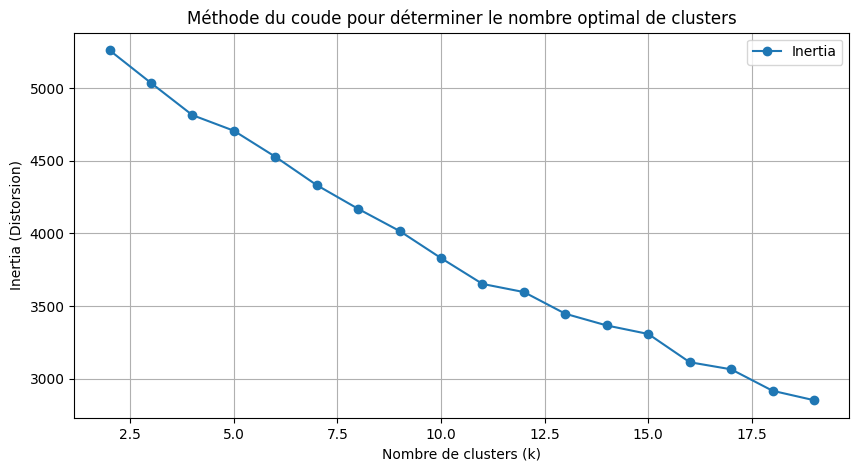

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 📌 Charger le dataset original
file_path = "dataset_with_details.csv"
full_df = pd.read_csv(file_path, usecols=["ISBN", "Tags"], quoting=3, on_bad_lines='skip')

# 📌 Nettoyage des Tags
full_df['Tags'] = full_df['Tags'].fillna('').astype(str).str.lower()

# 📌 Appliquer TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(full_df['Tags'])

# 📌 Méthode du coude
k_values = range(2, 20)  # Tester différents nombres de clusters
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# 📌 Visualisation du coude
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-', label="Inertia")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia (Distorsion)")
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.legend()
plt.grid(True)
plt.show()


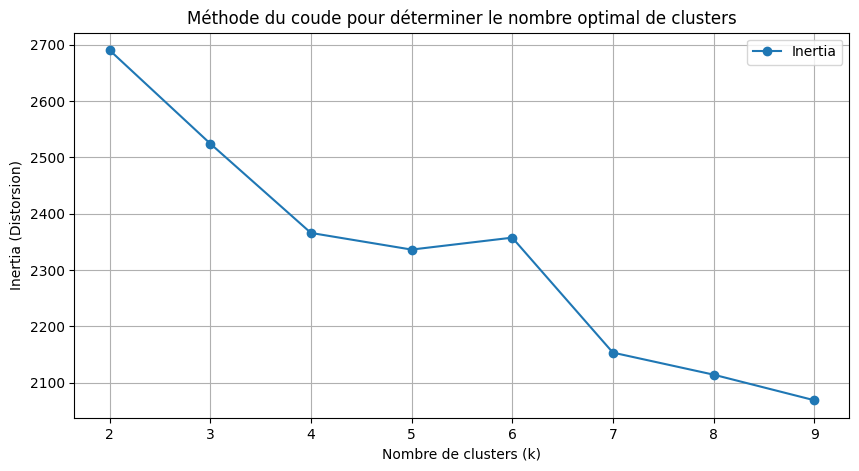

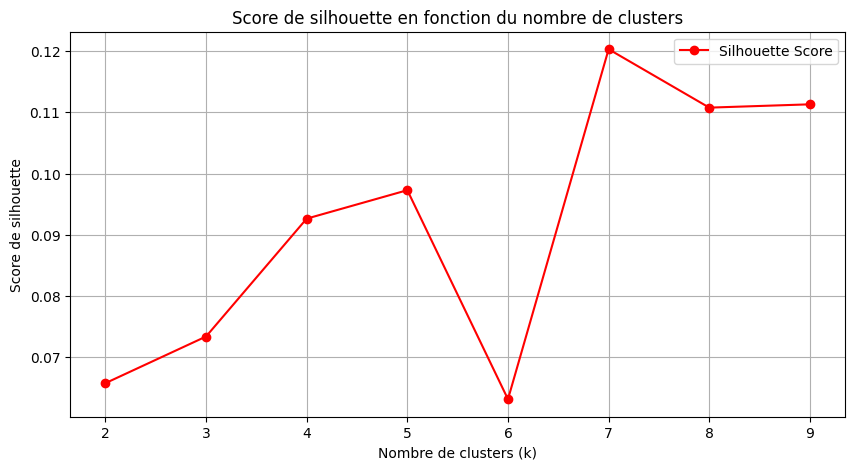

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD

# 📌 Charger le dataset original
file_path = "dataset_with_details.csv"
full_df = pd.read_csv(file_path, usecols=["ISBN", "Tags"])

# 📌 Réduire la taille du dataset (garder 10% des données)
full_df = full_df.sample(frac=0.1, random_state=42)

# 📌 Nettoyage des Tags
full_df['Tags'] = full_df['Tags'].fillna('').astype(str).str.lower()

# 📌 Appliquer TF-IDF (réduction du nombre de features)
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = vectorizer.fit_transform(full_df['Tags'])

# 📌 Réduire la dimension avec TruncatedSVD (équivalent PCA pour matrices creuses)
svd = TruncatedSVD(n_components=50, random_state=42)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# 📌 Déterminer le nombre optimal de clusters avec la méthode du coude et le score de silhouette
k_values = range(2, 10)  # Tester 2 à 9 clusters
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=5, max_iter=100, batch_size=1000)
    kmeans.fit(tfidf_matrix_reduced)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tfidf_matrix_reduced, kmeans.labels_))

# 📌 Visualisation du coude
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-', label="Inertia")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia (Distorsion)")
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.legend()
plt.grid(True)
plt.show()

# 📌 Visualisation du score de silhouette
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='red', label="Silhouette Score")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.title("Score de silhouette en fonction du nombre de clusters")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import nltk
nltk.download('wordnet')  # Télécharger WordNet
nltk.download('omw-1.4')  # Télécharger les données linguistiques associées


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [13]:
import nltk
nltk.download('wordnet')  # Télécharger WordNet
nltk.download('omw-1.4')  # Télécharger les données linguistiques associées


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

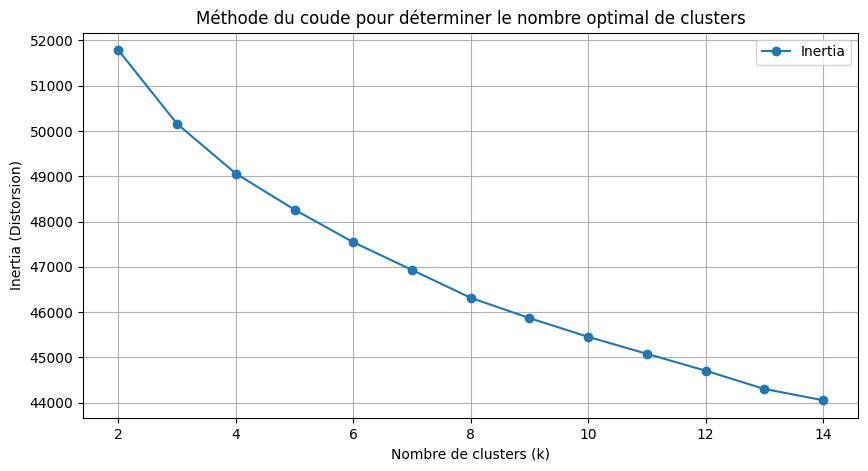

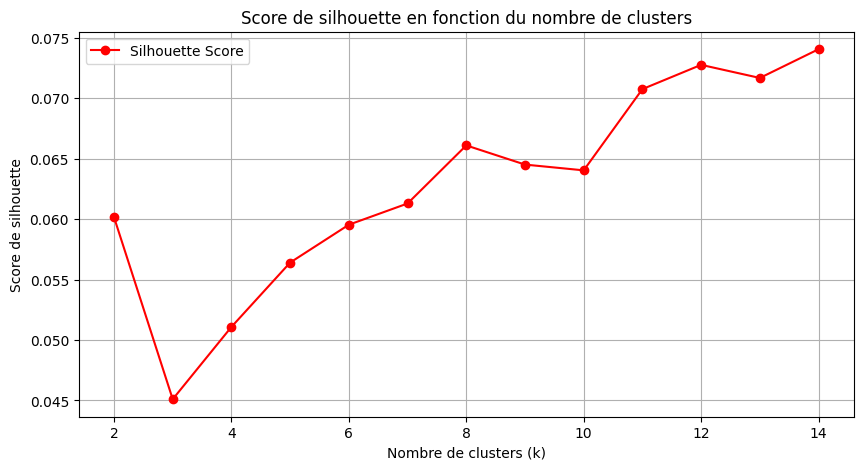

Dataset transformé et sauvegardé sous hdbscan_alternative_clusters_isbn_data.csv


In [15]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 📌 Charger le dataset original
file_path = "dataset_with_details.csv"
full_df = pd.read_csv(file_path, usecols=["ISBN", "Tags"])

# 📌 Nettoyage des Tags
def clean_tags(tags):
    tags = tags.lower()  # Convertir en minuscule
    tags = re.sub(r'[^\w\s]', '', tags)  # Supprimer caractères spéciaux
    tags = re.sub(r'\s+', ' ', tags).strip()  # Supprimer espaces inutiles
    return tags

full_df['Tags'] = full_df['Tags'].fillna('').apply(clean_tags)

# 📌 Appliquer TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(full_df['Tags'])

# 📌 Méthode du coude et score de silhouette
k_values = range(2, 15)  # Tester les clusters entre 2 et 14
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tfidf_matrix, kmeans.labels_))

# 📌 Visualisation du coude
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-', label="Inertia")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia (Distorsion)")
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.legend()
plt.grid(True)
plt.show()

# 📌 Visualisation du score de silhouette
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='red', label="Silhouette Score")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.title("Score de silhouette en fonction du nombre de clusters")
plt.legend()
plt.grid(True)
plt.show()

# 📌 Appliquer KMeans avec le nombre optimal de clusters (ex. : k=4 selon les graphiques)
optimal_k = 12  # Remplace par la meilleure valeur après analyse
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(tfidf_matrix)
full_df['Cluster'] = kmeans.labels_

# 📌 Sauvegarde du dataset transformé
output_path = "hdbscan_alternative_clusters_isbn_data.csv"
full_df.to_csv(output_path, index=False)

print(f"Dataset transformé et sauvegardé sous {output_path}")


In [16]:
df = pd.read_csv('hdbscan_alternative_clusters_isbn_data.csv')

In [17]:
df.head(10)

,ISBN,Tags,Cluster
0,0440234743,fiction women missionaries wills people with d...,6
1,0440234743,fiction women missionaries wills people with d...,6
2,0440234743,fiction women missionaries wills people with d...,6
3,0440234743,fiction women missionaries wills people with d...,6
4,0440234743,fiction women missionaries wills people with d...,6
5,0440234743,fiction women missionaries wills people with d...,6
6,0440234743,fiction women missionaries wills people with d...,6
7,0440234743,fiction women missionaries wills people with d...,6
8,0440234743,fiction women missionaries wills people with d...,6
9,0440234743,fiction women missionaries wills people with d...,6


In [18]:
# Comptage des valeurs uniques dans la colonne 'Cluster'
cluster_counts = df['Cluster'].value_counts()

# Affichage des résultats
print(cluster_counts)


Cluster
10    10069
1      8582
6      8450
0      7941
9      5048
5      4513
7      3623
2      3586
8      3040
11     2037
4      1626
3      1448
Name: count, dtype: int64


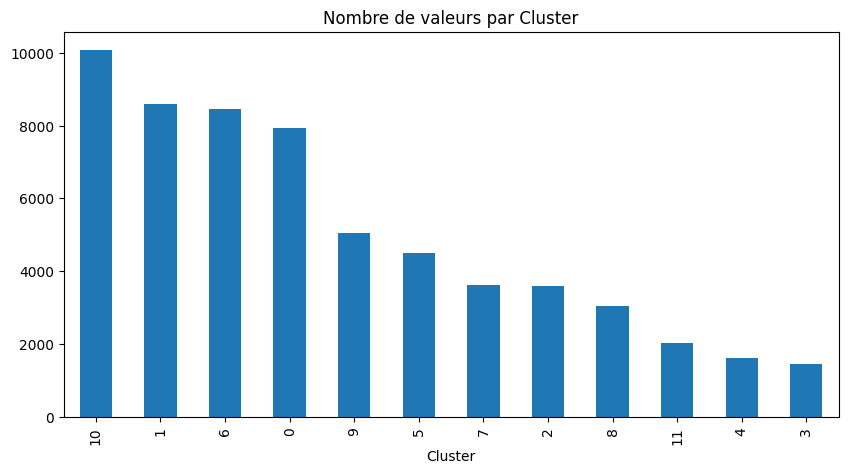

In [19]:
import matplotlib.pyplot as plt

# Création du graphique
cluster_counts.plot(kind='bar', figsize=(10, 5), title='Nombre de valeurs par Cluster')

# Affichage du graphique
plt.show()


,Cluster,Token,Count
0,0,and,10131
1,0,biography,6587
2,0,fiction,5831
3,0,life,4475
4,0,books,3578
5,1,fiction,64067
6,1,women,11466
7,1,and,11122
8,1,general,10534
9,1,life,8855


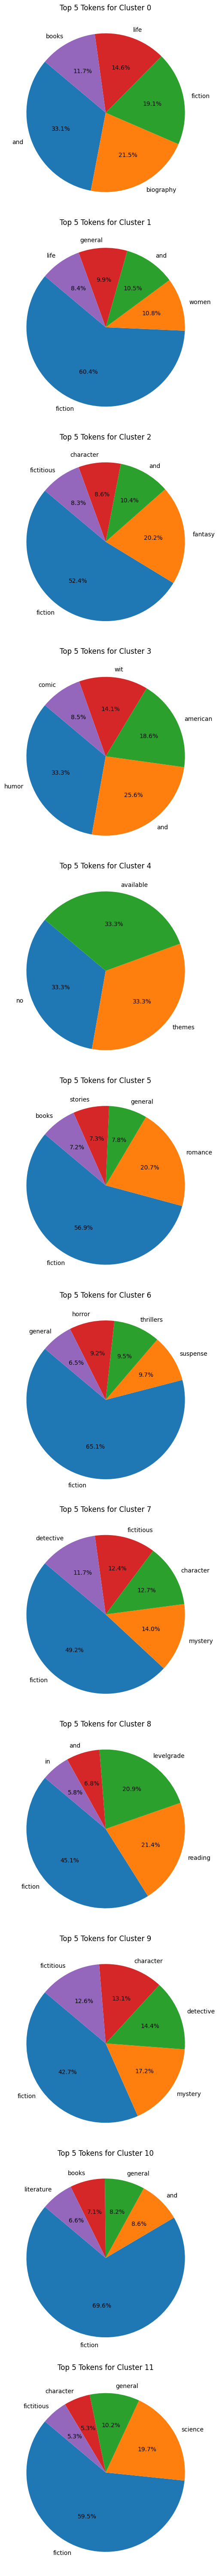

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Concaténer les tags pour chaque cluster en une seule chaîne
cluster_texts = full_df.groupby('Cluster')['Tags'].apply(lambda x: ' '.join(map(str, x))).reset_index()

# Fonction pour nettoyer et tokenizer les tags
def tokenize(text):
    text = text.lower()  # Mise en minuscule
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Retrait des caractères spéciaux
    tokens = text.split()  # Tokenization (séparation des mots)
    return tokens

# Appliquer la tokenization sur chaque cluster
cluster_texts['Tokens'] = cluster_texts['Tags'].apply(tokenize)

# Calculer la fréquence des tokens pour chaque cluster
def get_top_tokens(tokens, top_n=5):
    counter = Counter(tokens)
    return counter.most_common(top_n)

# Extraction des 5 tokens les plus fréquents par cluster
cluster_texts['Top_Tokens'] = cluster_texts['Tokens'].apply(lambda x: get_top_tokens(x, 5))

# Transformation en DataFrame exploitable
token_data = []
for _, row in cluster_texts.iterrows():
    cluster = row['Cluster']
    for token, count in row['Top_Tokens']:
        token_data.append([cluster, token, count])

top_tokens_per_cluster = pd.DataFrame(token_data, columns=['Cluster', 'Token', 'Count'])

# Affichage du DataFrame
from IPython.display import display
display(top_tokens_per_cluster)

# 🎨 Création des Pie Charts pour une meilleure visualisation
clusters = top_tokens_per_cluster['Cluster'].unique()
fig, axes = plt.subplots(nrows=len(clusters), figsize=(8, len(clusters) * 5))

if len(clusters) == 1:
    axes = [axes]

for ax, cluster in zip(axes, clusters):
    data = top_tokens_per_cluster[top_tokens_per_cluster['Cluster'] == cluster]
    ax.pie(data['Count'], labels=data['Token'], autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Top 5 Tokens for Cluster {cluster}')

plt.tight_layout()
plt.show()


,Cluster,Token,Count
0,0,biography,6587
1,0,fiction,5831
2,0,life,4475
3,0,books,3578
4,0,states,3500
...,...,...,...
107,11,american,1147
108,11,english,1082
109,11,life,899
110,11,adventure,837


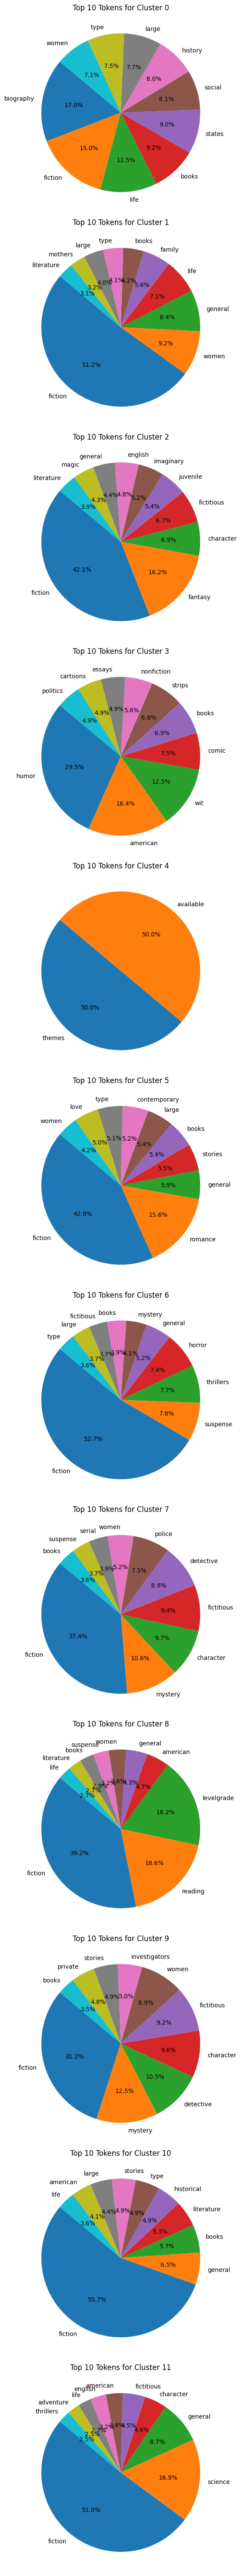

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Liste de stopwords (mots non significatifs à retirer)
stopwords = set([
    'the', 'and', 'is', 'in', 'of', 'to', 'for', 'on', 'with', 'as', 'at', 'by',
    'this', 'that', 'from', 'it', 'an', 'a', 'be', 'or', 'which', 'are', 'was'
])

# Concaténer les tags pour chaque cluster en une seule chaîne de texte
cluster_texts = full_df.groupby('Cluster')['Tags'].apply(lambda x: ' '.join(map(str, x))).reset_index()

# Fonction pour nettoyer et tokenizer les tags en supprimant les stopwords
def tokenize(text):
    text = text.lower()  # Mise en minuscule
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Retrait des caractères spéciaux
    tokens = text.split()  # Tokenization (séparation des mots)
    tokens = [t for t in tokens if t not in stopwords and len(t) > 2]  # Suppression des stopwords et des mots courts
    return tokens

# Appliquer la tokenization et le nettoyage
cluster_texts['Tokens'] = cluster_texts['Tags'].apply(tokenize)

# Fonction pour extraire les 10 tokens les plus fréquents
def get_top_tokens(tokens, top_n=10):
    counter = Counter(tokens)
    return counter.most_common(top_n)

# Extraction des 10 tokens les plus représentatifs par cluster
cluster_texts['Top_Tokens'] = cluster_texts['Tokens'].apply(lambda x: get_top_tokens(x, 10))

# Transformation en DataFrame exploitable
token_data = []
for _, row in cluster_texts.iterrows():
    cluster = row['Cluster']
    for token, count in row['Top_Tokens']:
        token_data.append([cluster, token, count])

top_tokens_per_cluster = pd.DataFrame(token_data, columns=['Cluster', 'Token', 'Count'])

# 📊 Affichage du DataFrame
from IPython.display import display
display(top_tokens_per_cluster)

# 🎨 Création des Pie Charts pour une meilleure visualisation
clusters = top_tokens_per_cluster['Cluster'].unique()
fig, axes = plt.subplots(nrows=len(clusters), figsize=(8, len(clusters) * 5))

if len(clusters) == 1:
    axes = [axes]

for ax, cluster in zip(axes, clusters):
    data = top_tokens_per_cluster[top_tokens_per_cluster['Cluster'] == cluster]
    ax.pie(data['Count'], labels=data['Token'], autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Top 10 Tokens for Cluster {cluster}')

plt.tight_layout()
plt.show()
